<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Columns: 140 entries, Date to FEF2575.1
dtypes: float64(135), object(5)
memory usage: 641.1+ KB
None


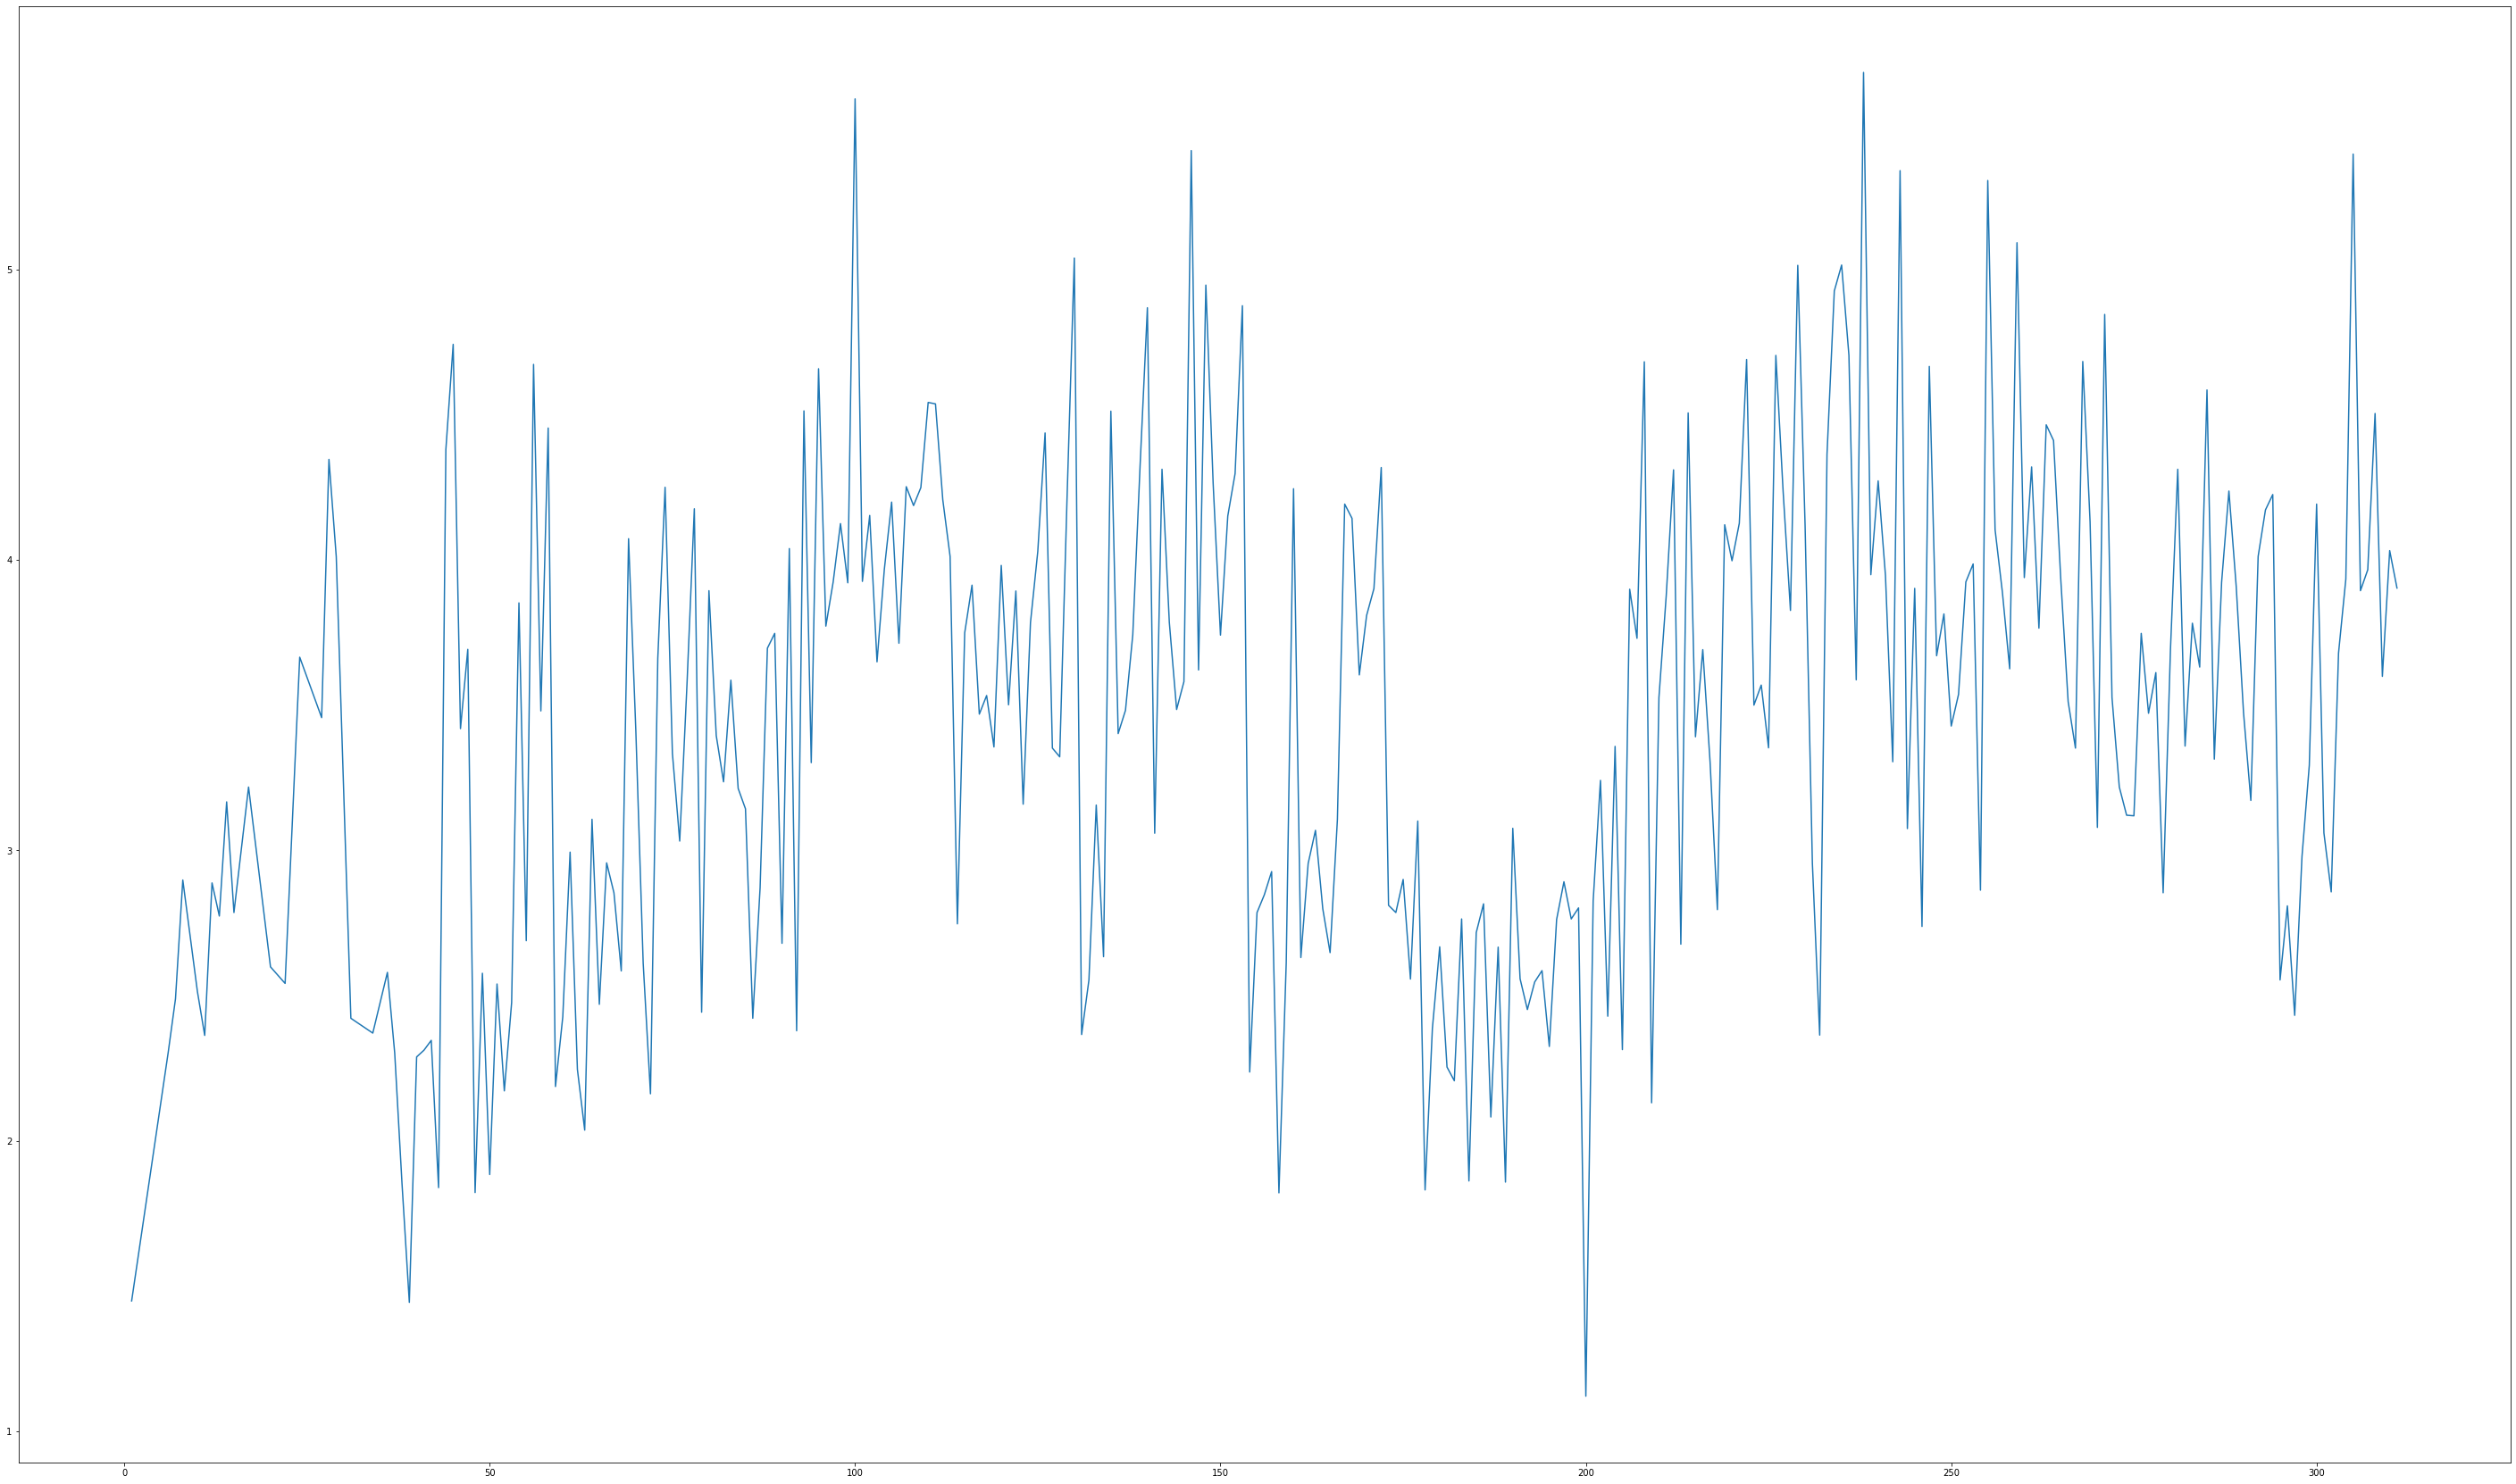

In [4]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

# Assign spreadsheet filename: file
file = 'D:/archive/completed latest.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

df1 = xl.parse('Main Datasheet')

print(df1.info())
plt.figure(figsize=(50,30))

# Make a line plot: year on the x-axis, pop on the y-axis
plt.plot(df1['PatientID'],df1['FVC'])

# Display the plot with plt.show()
plt.show()


In [5]:
df1.head()

,Date,PatientID,Name,QCGrade,Key Number,Family Number,BirthDate,Height,Weight,Gender,...,iron score,antioxidant score,R5,R20,X5,X20,PatientID.1,FEV1.1,FVC.1,FEF2575.1
0,12.10.2017,1.0,Namrata Ankur Kale,1.0,12600111.0,689.0,10.9.1995,162.0,39.0,0.0,...,285.0,414.0,-0.0264415,1.397745,-0.526765,-0.732509,1.0,1.431,1.449,3.149
1,17.1.2018,6.0,PRPJAKTA JAGTAP,5.0,20201111.0,40.0,27.2.1995,152.0,50.0,0.0,...,166.0,187.0,4.47561,4.665550,-3.002428,-1.304583,6.0,2.131,2.304,3.031
2,13.1.2018,7.0,RAJASHREE DAPHAL,5.0,20803211.0,414.0,21.12.1995,152.0,36.0,0.0,...,107.0,94.0,3.39939,6.790345,-1.340907,0.260649,7.0,2.442,2.489,4.609
3,13.1.2018,8.0,VARSHA SHINDE,5.0,20314011.0,14.0,1.1.1995,157.0,44.0,0.0,...,100.0,164.0,2.04021,3.711032,-1.999432,-1.335354,8.0,2.552,2.898,3.151
4,13.1.2018,10.0,SUVARNA KHAIRE,5.0,20309221.0,618.0,29.4.1996,151.0,40.0,0.0,...,65.0,83.0,3.67953,6.457651,-0.173237,-1.161437,10.0,2.437,2.514,4.334


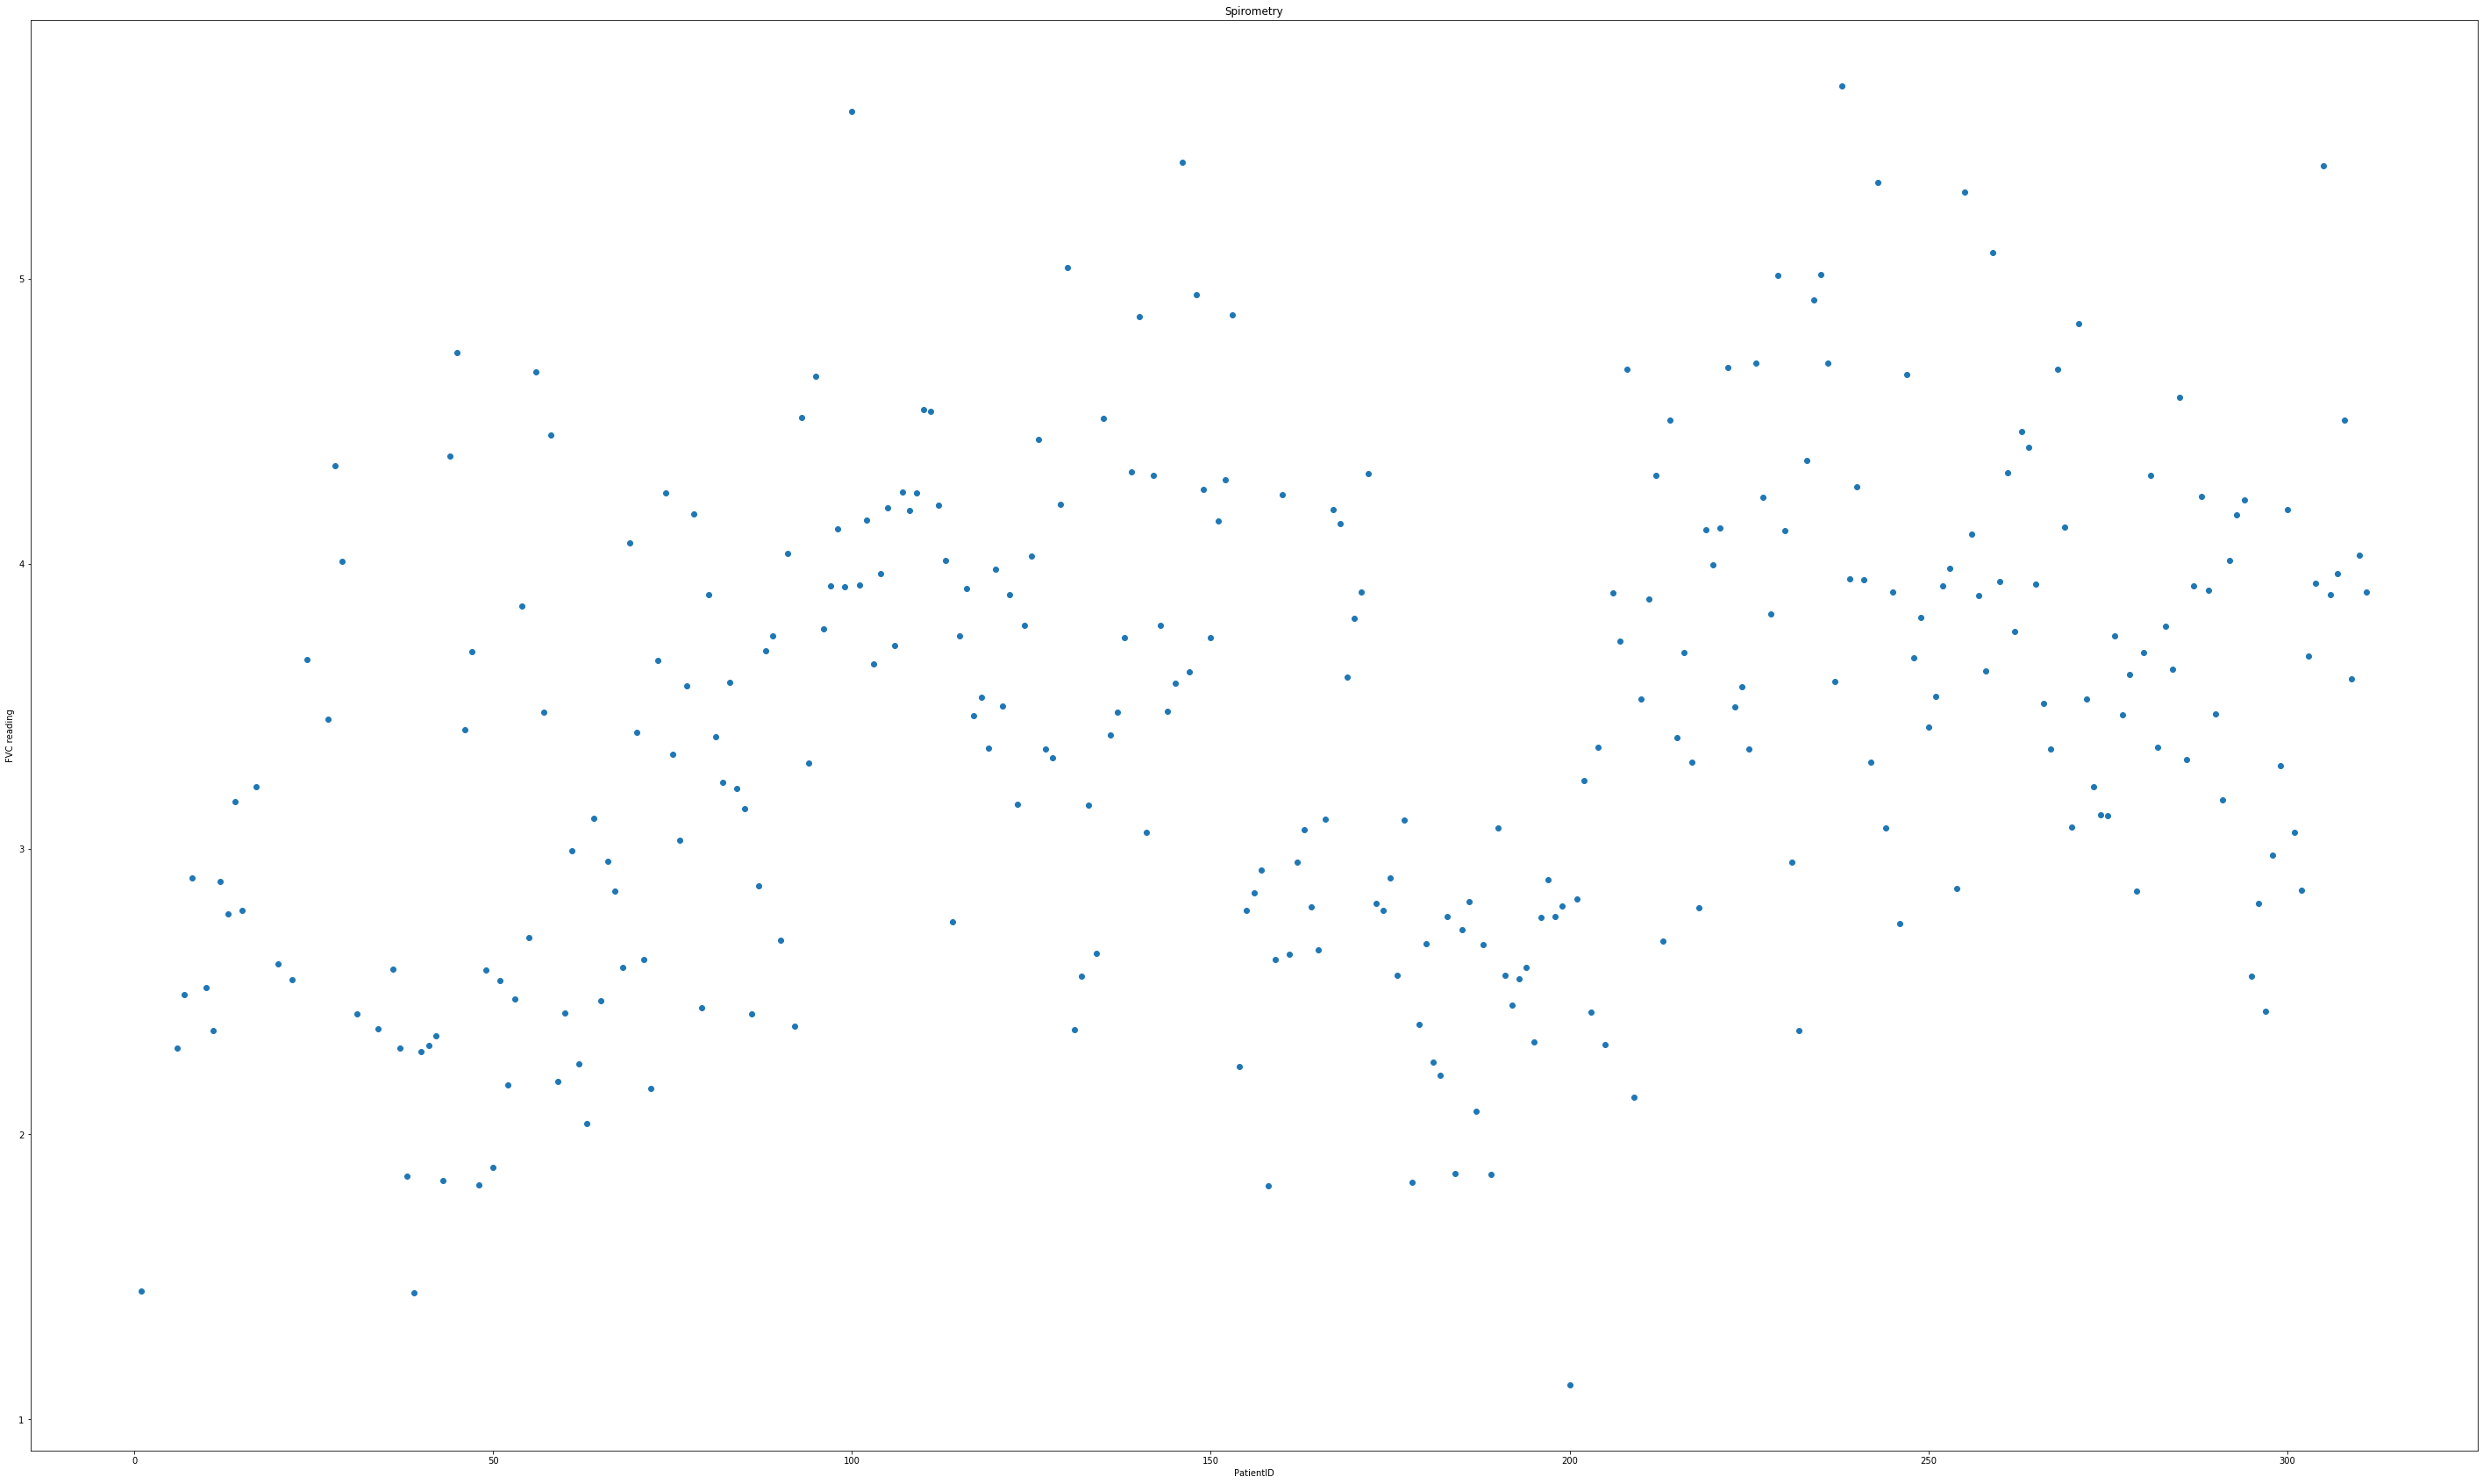

In [6]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

# Load spreadsheet: Df

df = pd.read_excel('D:/archive/completed latest.xlsx', sheet_name='Main Datasheet')
plt.figure(figsize=(50,30))

# print("Column headings:")
# print(df.columns)


# Make a line plot: year on the x-axis, pop on the y-axis
plt.scatter(df['PatientID'],df['FVC'])
xlab = 'PatientID'
ylab = 'FVC reading'
title = 'Spirometry'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Add title
plt.title(title)

# Display the plot with plt.show()
plt.show()

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n=len(data)

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

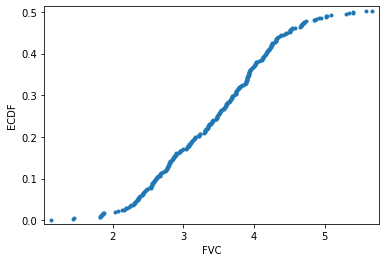

In [8]:
import numpy as np

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(df['FVC'])

# Generate plot
_=plt.plot(x_vers,y_vers,marker = '.',linestyle = 'none')

# Make the margins nice
_=plt.margins(0.02)

# Label the axes
_=plt.xlabel('FVC')
_=plt.ylabel('ECDF')

# Display the plot
plt.show()

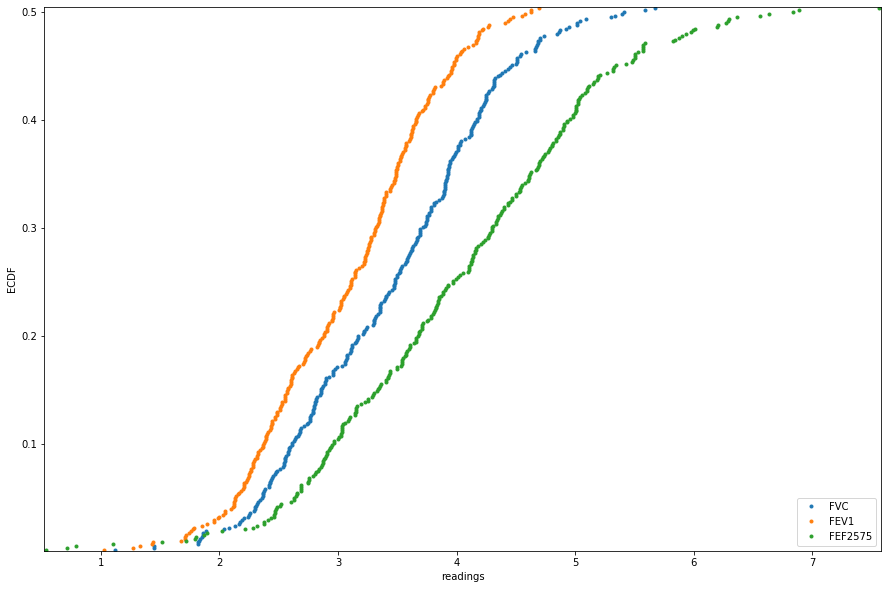

In [9]:
# Compute ECDFs
x_set, y_set=ecdf(df['FVC'])
x_vers, y_vers=ecdf(df['FEV1'])
x_virg, y_virg=ecdf(df['FEF2575'])

plt.figure(figsize=(15,10))

# Plot all ECDFs on the same plot
_=plt.plot(x_set, y_set,marker = '.',linestyle = 'none')
_=plt.plot(x_vers, y_vers,marker = '.',linestyle = 'none')
_=plt.plot(x_virg, y_virg,marker = '.',linestyle = 'none')

# Make nice margins
plt.margins(0.002)

# Annotate the plot
plt.legend(('FVC', 'FEV1', 'FEF2575'), loc='lower right')
_ = plt.xlabel('readings')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

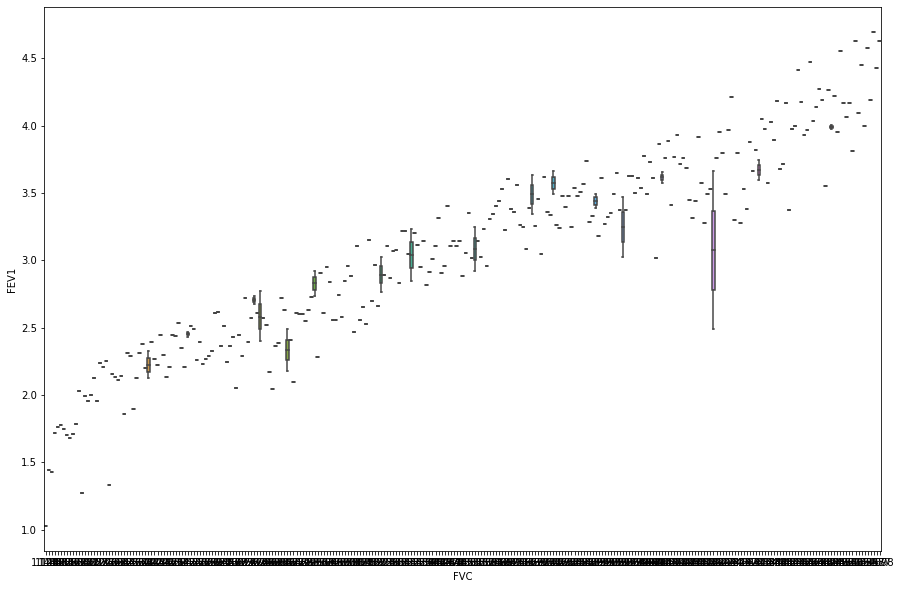

In [11]:
import seaborn as sns

plt.figure(figsize=(15,10))
# Create box plot with Seaborn's default settings
_= sns.boxplot(x='FVC',y='FEV1',data=df)

# Label the axes
_ = plt.xlabel('FVC')
_ = plt.ylabel('FEV1')

# Show the plot
plt.show()

In [12]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix= np.cov(df['FVC'],df['FEV1'])

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[nan nan]
 [nan nan]]
nan


In [18]:
# Import figure from bokeh.plotting
from bokeh.plotting import figure

# Import output_file and show from bokeh.io
from bokeh.io import output_file, show

# Create the figure: p
p = figure(x_axis_label='fertility (children per woman)', y_axis_label='female_literacy (% population)')

# Add a circle glyph to the figure p
p.circle(df['FVC'], df['FEV1'])

# Call the output_file() function and specify the name of the file
output_file('fert_lit.html')

# Display the plot
show(p)

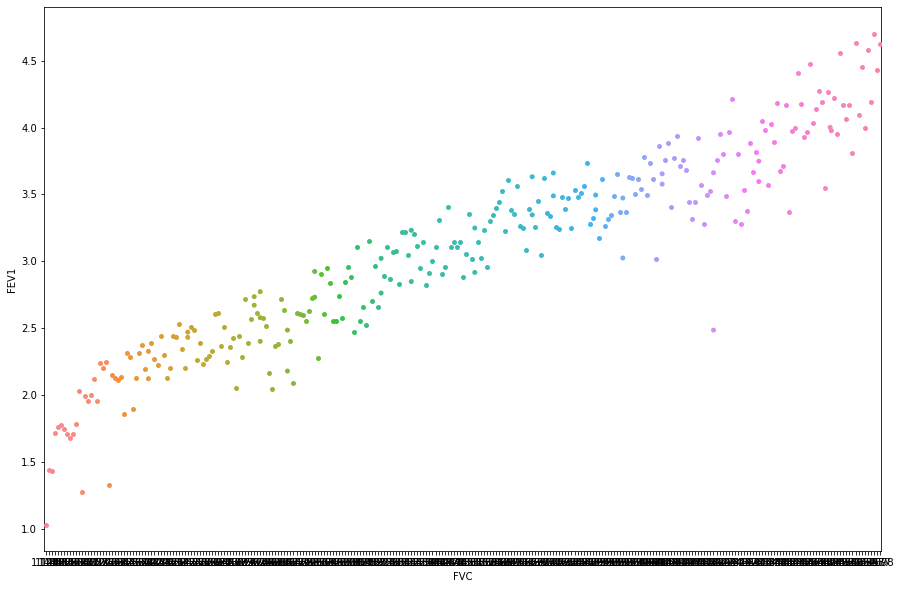

In [19]:
plt.figure(figsize=(15,10))

# Make bee swarm plot
_ = sns.swarmplot(x='FVC',y='FEV1',data=df )

# Label axes
_ = plt.xlabel('FVC')
_ = plt.ylabel('FEV1')

# Show the plot
plt.show()

In [16]:
# Assign spreadsheet filename: file
file = 'D:/archive/FFinal Data Collection-Rural  Site-OSCAR  Study 13-7-19.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

df2 = xl.parse('Mulkhed+Thakure+Dipti')

In [23]:
df2.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Sr No,Date,ID NO,Full Name,Address,Phone Number,Date of Birth,Informed consent form,Peak flow meter Readings,NaN,...,Date of Spirometry \n,NaN,NaN,Comment,print,NaN,Calls,Response,Technitian,SrNo 1112337
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading 1,Reading 2,...,NaN,Pre,post,NaN,print,NaN,NaN,NaN,NaN,NaN
2,1,2018-12-28 00:00:00,OSCAR/MM/SST/001,Surekha Santosh Tapkir,"Gayran Vasti , Panyachya Taki Jawal Mulkhed",9922755205,1985-10-13 00:00:00,Yes,230,250,...,2018-12-24 00:00:00,A,A,A,yes,NaN,NaN,NaN,NaN,NaN
3,2,2018-12-28 00:00:00,OSCAR/MM/DST/002,Dipak Sadashiv Tapkir,"Gayran Vasti , Panyachya Taki Jawal Mulkhed",9822320951,1974-02-07 00:00:00,Yes,500,500,...,2018-12-18 00:00:00,B,A,A,yes,NaN,NaN,NaN,NaN,NaN
4,3,2018-12-28 00:00:00,OSCAR/MM/BST/003,Balasaheb Sadashiv Tapkir,"Gayran Vasti , Panyachya Taki Jawal Mulkhed",9921633351,1974-03-01 00:00:00,Yes,500,520,...,2018-12-18 00:00:00,B,D,A,yes,NaN,NaN,NaN,NaN,NaN
5,4,2018-12-28 00:00:00,OSCAR/MM/KBT/004,Kavita Balasaheb Tapkir,"Gayran Vasti , Panyachya Taki Jawal Mulkhed",9921633351,1982-03-07 00:00:00,Yes,320,330,...,2018-12-18 00:00:00,A,A,A,yes,NaN,NaN,NaN,NaN,NaN
6,5,2018-12-28 00:00:00,OSCAR/MM/UBT/005,Uttam Baburao Tapkir,"Gayran Vasti , Mulkhed",9822385114,1953-06-01 00:00:00,Yes,380,390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6,2018-12-28 00:00:00,OSCAR/MM/SBT/006,Sudam Baburao Tapkir,"Gayran Vasti , Mulkhed",9657930409,1956-06-01 00:00:00,Yes,430,440,...,2018-12-25 00:00:00,A,A,A,yes,NaN,NaN,NaN,NaN,NaN
8,7,2018-12-28 00:00:00,OSCAR/MM/SUT/007,Suman Uttam Tapkir,"Gayran Vasti , Mulkhed",0,1963-06-01 00:00:00,Yes,200,250,...,2018-12-25 00:00:00,A,A,A,yes,NaN,NaN,NaN,NaN,NaN
9,8,2018-12-28 00:00:00,OSCAR/MM/SST/008,Shoba Sudam Tapkir,"Gayran Vasti , Mulkhed",0,1962-04-02 00:00:00,Yes,200,230,...,2018-12-25 00:00:00,C,F,A,yes,NaN,NaN,NaN,NaN,NaN


In [24]:
spd = pd.read_csv("D:/archive/archive/latest spiro data.csv",encoding = 'unicode_escape')

In [25]:
spd.head(20)

,SerNr,RecNum,TypeOfTest,Date,PatientID,Name,BirthDate,Height,Weight,Gender,...,BEV,Pred_FVC,LLN_FVC,Pred_FEV1,LLN_FEV1,Pred_FEV1FVC,LLN_FEV1FVC,Pred_PEF,LLN_PEF,TechnID
0,55701,2653,2,12.10.2017,1,Namrata Ankur Kale,10.9.1995,162,39.0,1,...,0.055,3.636,2.929,3.174,2.548,84.3,73.5,7.050,5.569,NaN
1,55701,3036,2,31.12.2017,213,MANISHA SHINDE,22.12.1995,153,62.0,1,...,0.077,3.237,2.530,2.818,2.192,84.3,73.5,6.555,5.074,NaN
2,55701,3035,2,31.12.2017,213,MANISHA SHINDE,22.12.1995,153,62.0,1,...,0.121,3.237,2.530,2.818,2.192,84.3,73.5,6.555,5.074,NaN
3,55701,3034,2,31.12.2017,213,MANISHA SHINDE,22.12.1995,153,62.0,1,...,0.115,3.237,2.530,2.818,2.192,84.3,73.5,6.555,5.074,NaN
4,55701,3033,2,31.12.2017,212,AKASH DAREKAR,23.6.1995,185,71.0,0,...,0.076,5.666,4.662,4.740,3.901,82.7,70.9,10.434,8.443,NaN
5,55701,3032,2,31.12.2017,210,VISHAL PARHAD,2.2.1996,173,68.0,0,...,0.062,4.974,3.971,4.224,3.384,82.7,70.9,9.697,7.706,NaN
6,55701,3031,2,31.12.2017,210,VISHAL PARHAD,2.2.1996,173,68.0,0,...,0.101,4.974,3.971,4.224,3.384,82.7,70.9,9.697,7.706,NaN
7,55701,3030,2,31.12.2017,211,SANDIP PARHAD,18.2.1996,174,55.0,0,...,0.090,5.032,4.028,4.267,3.427,82.7,70.9,9.758,7.767,NaN
8,55701,3029,2,31.12.2017,208,SUYOG DHOKALE,17.7.1995,167,66.0,0,...,0.105,4.629,3.625,3.966,3.126,82.7,70.9,9.329,7.338,NaN
9,55701,3028,2,31.12.2017,208,SUYOG DHOKALE,17.7.1995,167,66.0,0,...,0.097,4.629,3.625,3.966,3.126,82.7,70.9,9.329,7.338,NaN
